<a href="https://colab.research.google.com/github/shoreey/Real-Estate-Price-Prediction-and-Analysis/blob/main/Real_Estate_Price_Prediction_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the Dataset

In [ ]:
data = pd.read_csv("E:\Real estate.csv")


# initial Exploration

In [ ]:
print(data.head())
print(data.info())


   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

# summary statistics

In [ ]:
print(data.describe())


               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

# Data Visualization:
Created visualizations to gain insights into the data.
Histograms for numerical variables.

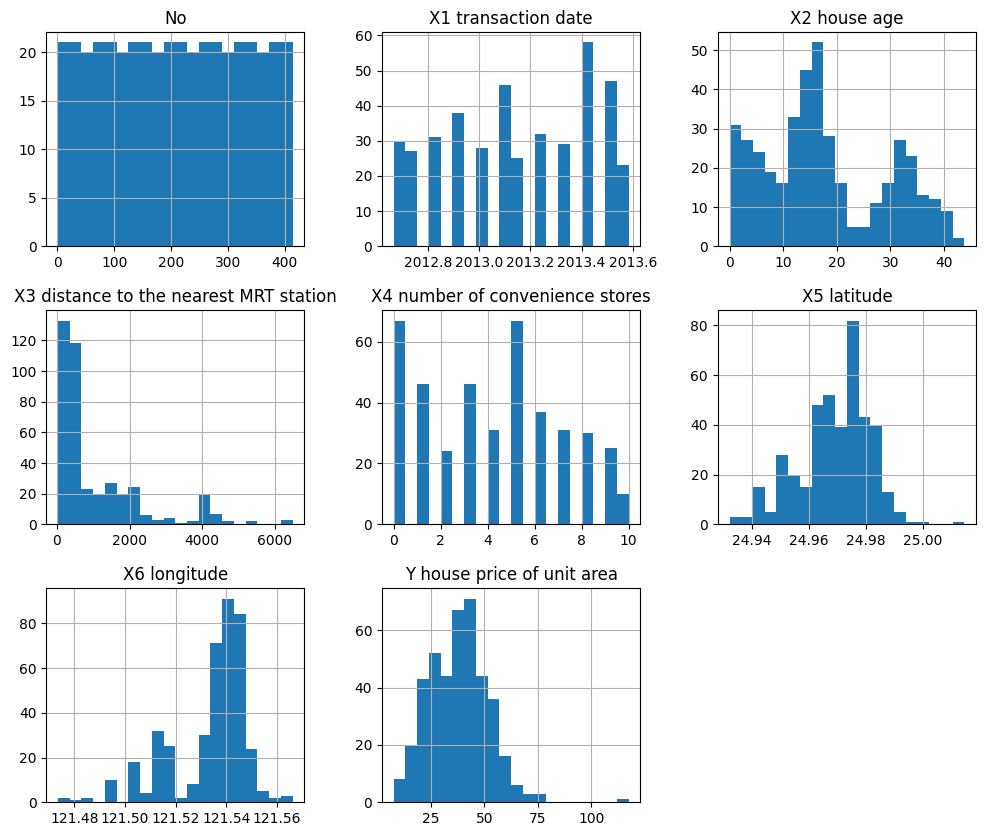

In [ ]:
data.hist(bins=20, figsize=(12, 10))
plt.show()


# Scatter plots to explore relationships between variables.

C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


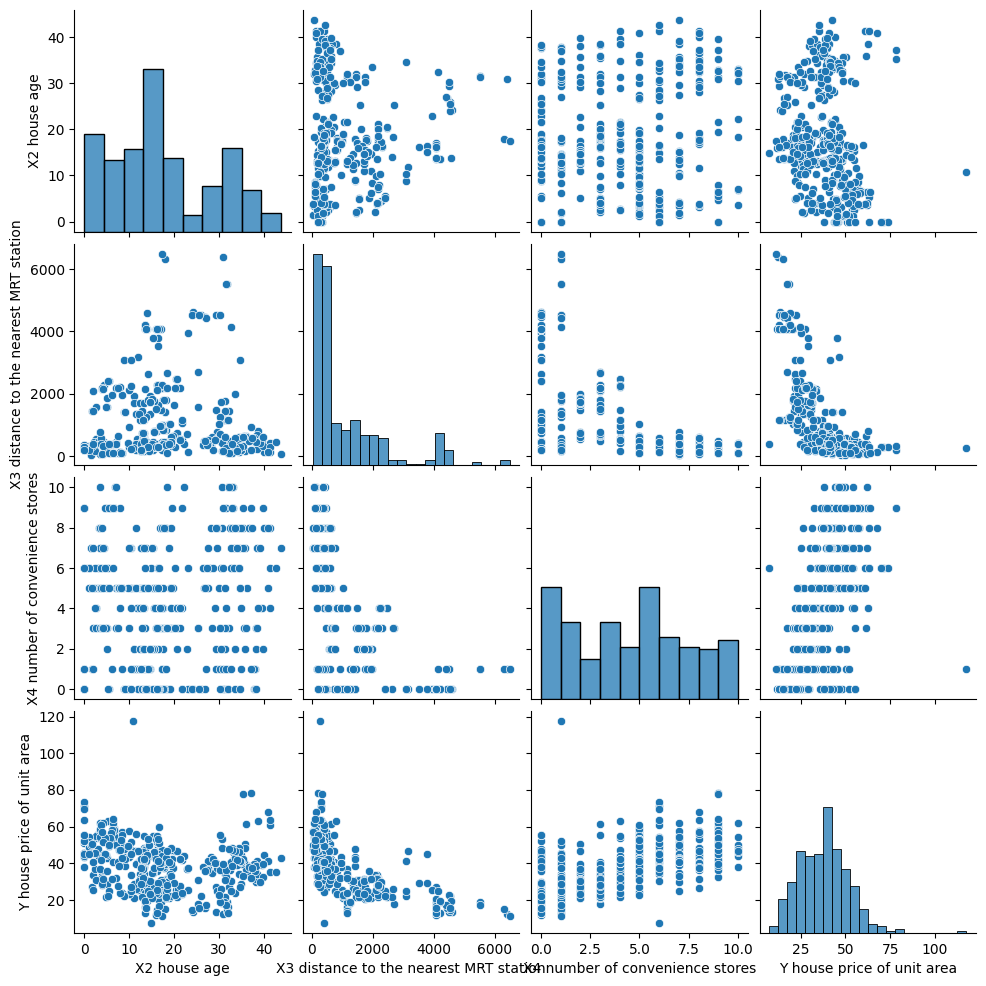

In [ ]:
sns.pairplot(data, vars=['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'Y house price of unit area'])
plt.show()


# Box plot

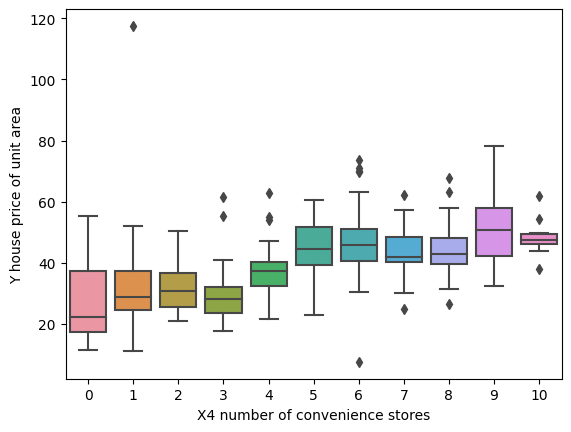

In [ ]:
sns.boxplot(x='X4 number of convenience stores', y='Y house price of unit area', data=data)
plt.show()


# Correlation

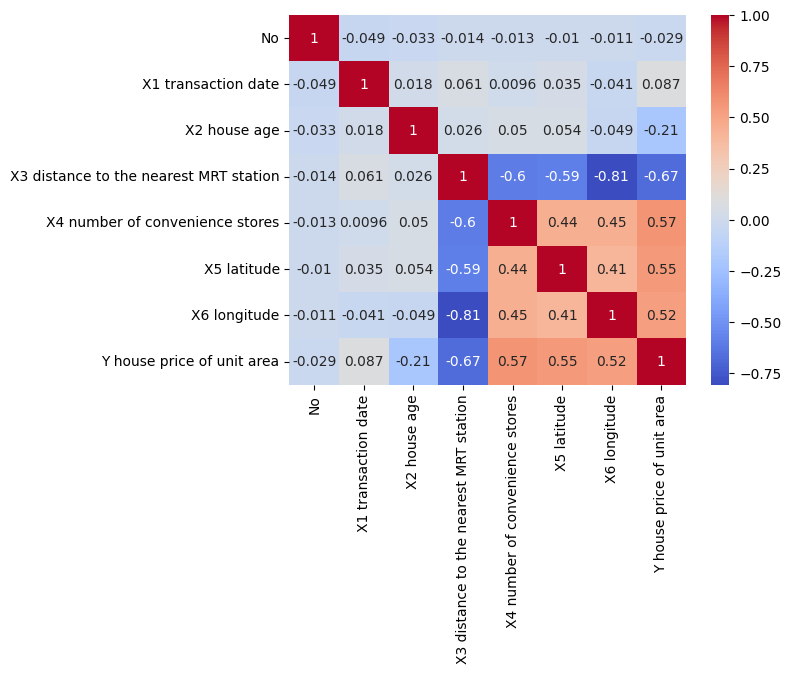

Correlation Matrix:
                                              No  X1 transaction date  \
No                                      1.000000            -0.048658   
X1 transaction date                    -0.048658             1.000000   
X2 house age                           -0.032808             0.017549   
X3 distance to the nearest MRT station -0.013573             0.060880   
X4 number of convenience stores        -0.012699             0.009635   
X5 latitude                            -0.010110             0.035058   
X6 longitude                           -0.011059            -0.041082   
Y house price of unit area             -0.028587             0.087491   

                                        X2 house age  \
No                                         -0.032808   
X1 transaction date                         0.017549   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.025622   
X4 number of convenience stores           

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


# Missing Values

In [ ]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Remove duplicates
data = data.drop_duplicates()

# Handle missing values (example: filling missing values with the mean)
data['X2 house age'].fillna(data['X2 house age'].mean(), inplace=True)


Missing values:
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


# Hypothesis testing

In [ ]:
from scipy.stats import ttest_ind

# Example: Test if 'X4 number of convenience stores' has a significant effect on 'Y house price of unit area'
grouped_data = data.groupby('X4 number of convenience stores')
for name, group in grouped_data:
    group1 = group['Y house price of unit area']
    group2 = data[data['X4 number of convenience stores'] != name]['Y house price of unit area']
    t_stat, p_value = ttest_ind(group1, group2)
    print(f'T-test for {name} vs. others: t-statistic={t_stat}, p-value={p_value}')


T-test for 0 vs. others: t-statistic=-8.14473814649966, p-value=4.5772206748005576e-15
T-test for 1 vs. others: t-statistic=-3.2850408696365365, p-value=0.0011068615090797534
T-test for 2 vs. others: t-statistic=-2.4510799506719936, p-value=0.014657416922946545
T-test for 3 vs. others: t-statistic=-4.5701448571806, p-value=6.451186672593089e-06
T-test for 4 vs. others: t-statistic=-0.21502244485760247, p-value=0.8298562139011326
T-test for 5 vs. others: t-statistic=4.539195914366783, p-value=7.421663586886314e-06
T-test for 6 vs. others: t-statistic=4.290399555327795, p-value=2.2248786072023094e-05
T-test for 7 vs. others: t-statistic=2.512555543102273, p-value=0.012367073862306704
T-test for 8 vs. others: t-statistic=2.8310513802919335, p-value=0.0048668096910769116
T-test for 9 vs. others: t-statistic=5.387214166173631, p-value=1.205859908370602e-07
T-test for 10 vs. others: t-statistic=2.4736983262176966, p-value=0.013774410496205156


# distribution plots and scatter plots for each numerical column

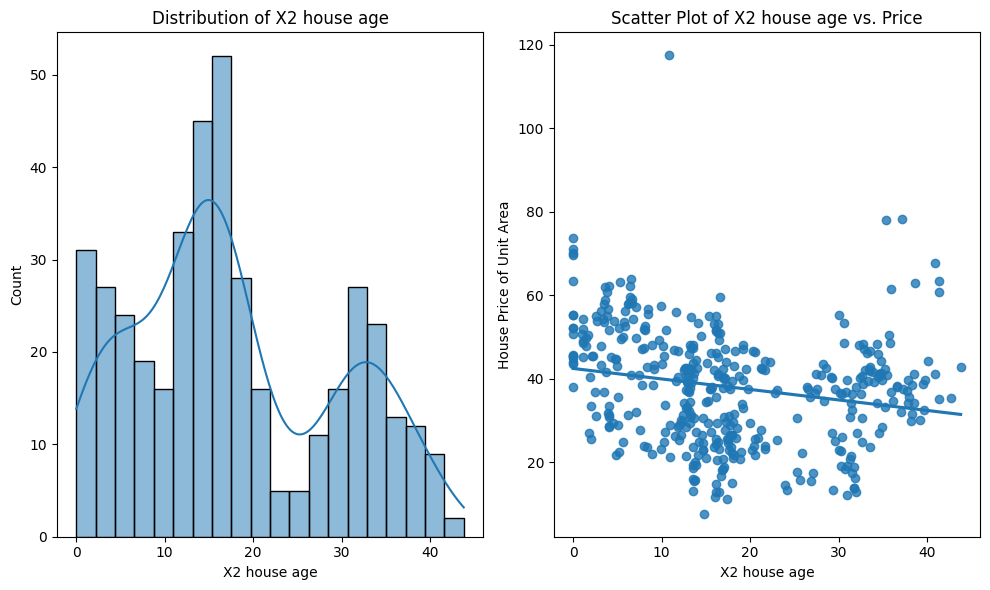

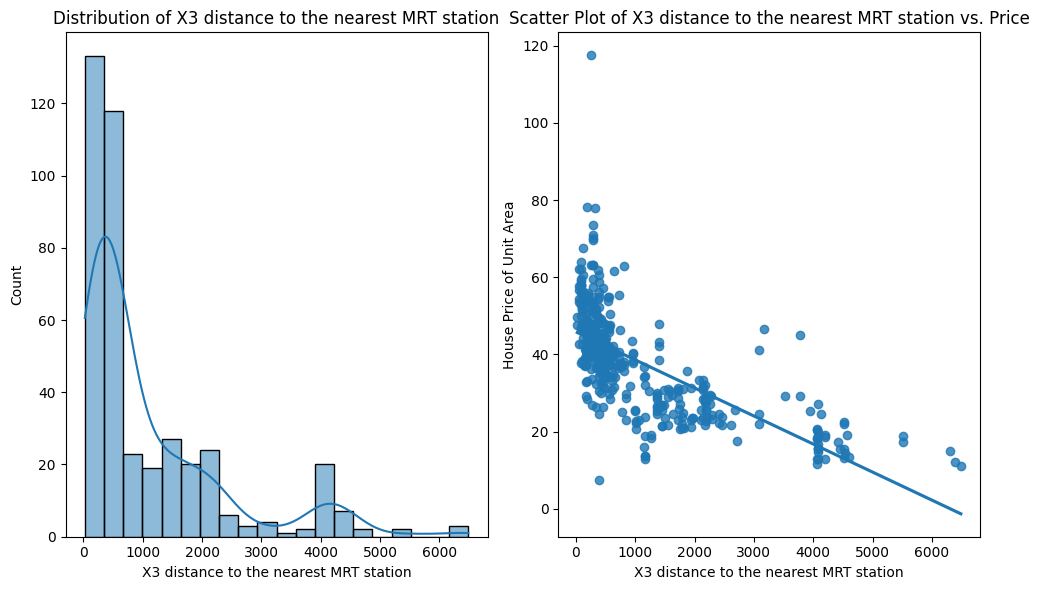

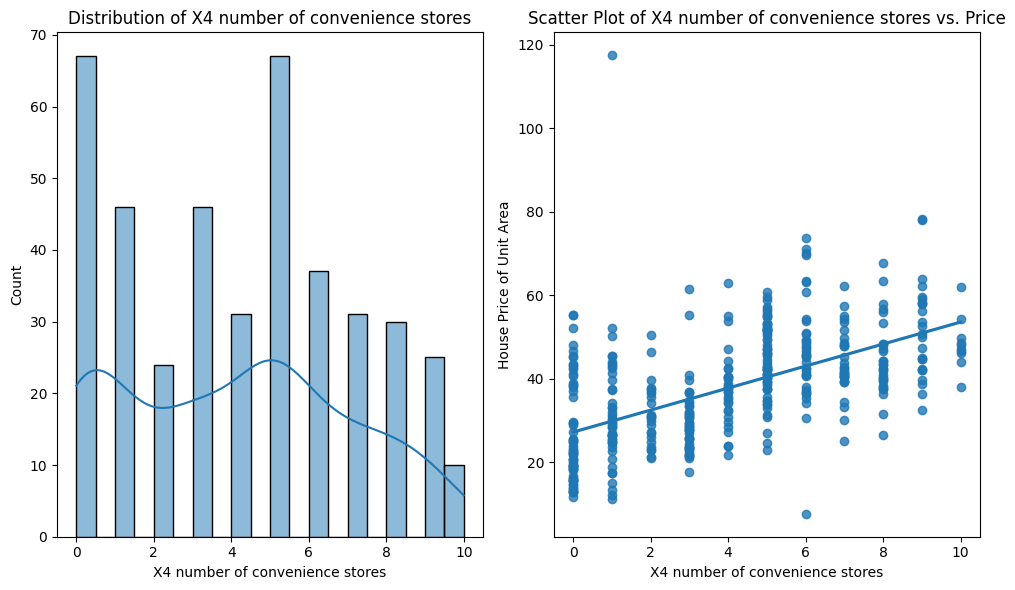

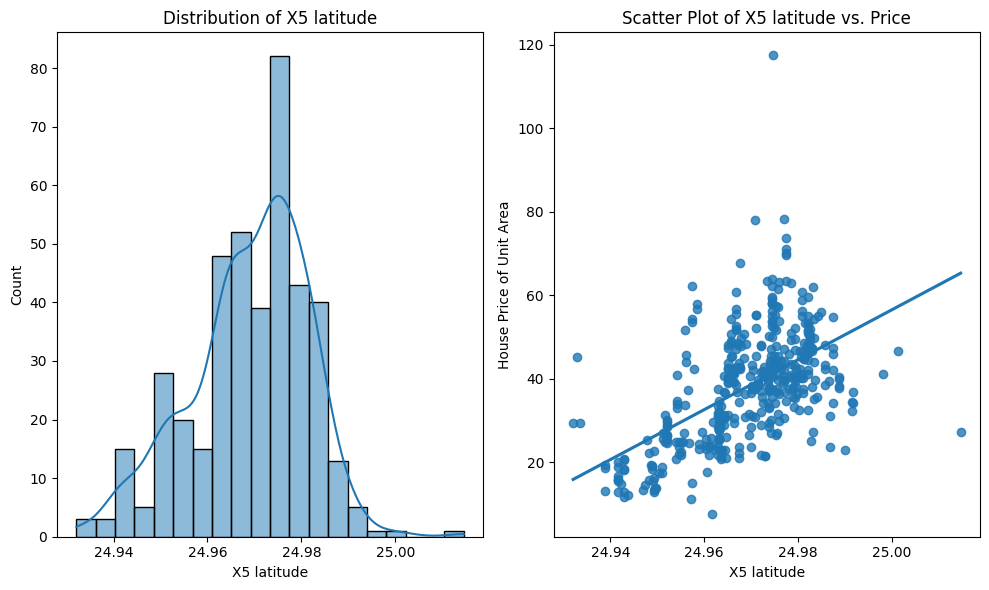

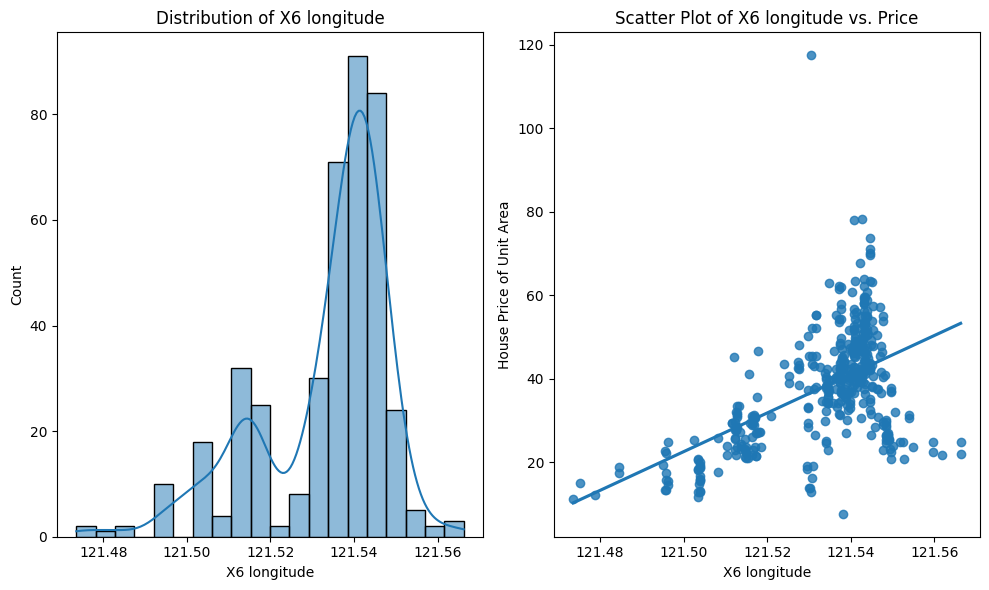

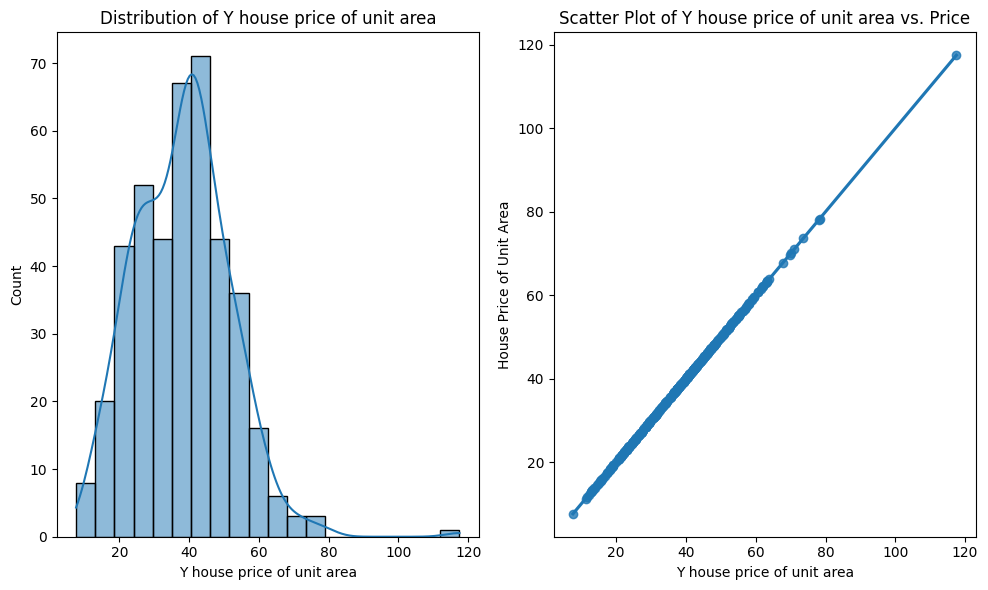

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract numerical columns (excluding the 'No' column)
numerical_columns = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']

# Create distribution plots and scatter plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))

    # Distribution Plot
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], bins=20, kde=True)
    plt.xlabel(column)
    plt.title(f'Distribution of {column}')

    # Scatter Plot with Regression Line
    plt.subplot(1, 2, 2)
    sns.regplot(x=column, y='Y house price of unit area', data=data, ci=None)
    plt.xlabel(column)
    plt.ylabel('House Price of Unit Area')
    plt.title(f'Scatter Plot of {column} vs. Price')

    plt.tight_layout()
    plt.show()


# Model Building

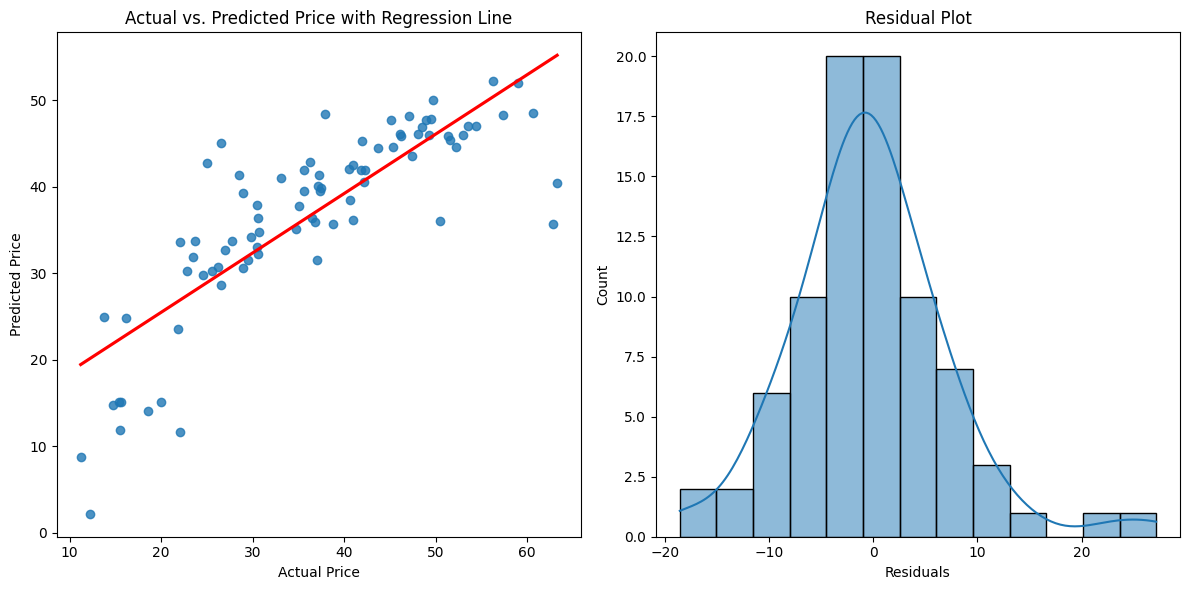

Model Coefficients:
X2 house age: -0.2705932358164285
X3 distance to the nearest MRT station: -0.004552496013786681
X4 number of convenience stores: 1.1051207909625473
X5 latitude: 236.09283090508723
X6 longitude: -23.903694181762624
Mean Squared Error (MSE): 54.58094520086296
R-squared (R2): 0.6746481382828127


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the features (independent variables) and the target (dependent variable)
X = data[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = data['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the results with a regression line
plt.figure(figsize=(12, 6))

# Actual vs. Predicted plot with regression line
plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={"color": "red"})
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price with Regression Line')

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# Print the model coefficients
print("Model Coefficients:")
for feature, coefficient in zip(X.columns, model.coef_):
    print(f"{feature}: {coefficient}")

# Print model performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 54.839122891566284
R-squared (R2): 0.6731091654413741


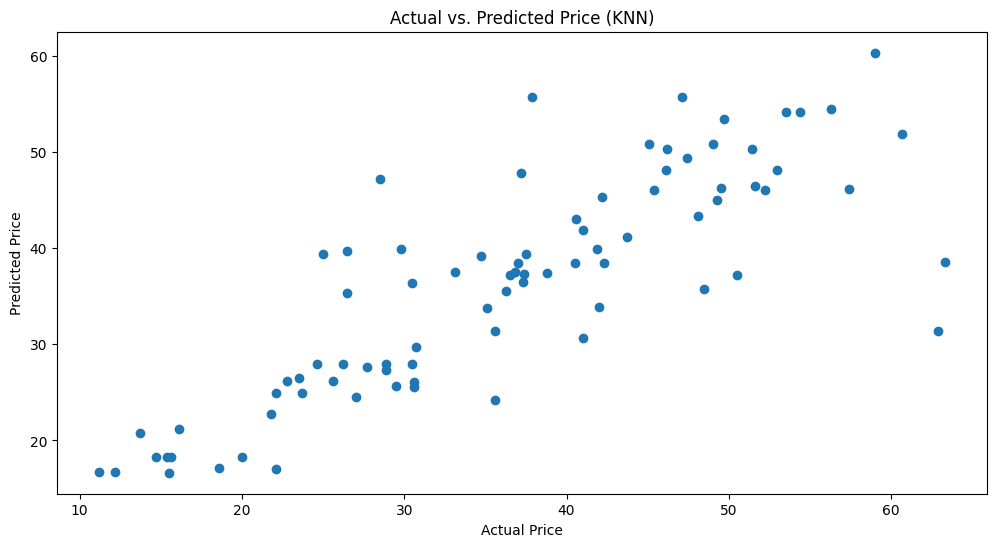

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select the features (independent variables) and the target (dependent variable)
X = data[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = data['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the KNN regression model
k = 5  # Number of neighbors (you can adjust this)
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Calculate the model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Visualize the results (optional)
plt.figure(figsize=(12, 6))

# Actual vs. Predicted plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price (KNN)')

plt.show()


# Hyper parameter Tuning

Best K for KNN: 2
Mean Squared Error (MSE): 49.602590361445785
R-squared (R2): 0.7043236415071052


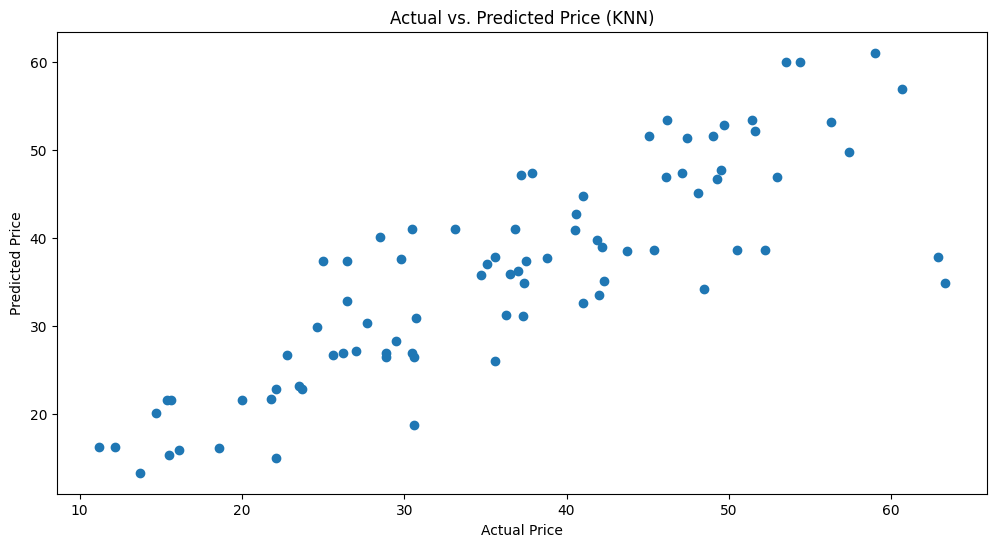

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select the features (independent variables) and the target (dependent variable)
X = data[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = data['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range of neighbors (k values) to explore
k_values = range(1, 21)

# Create a parameter grid for grid search
param_grid = {'n_neighbors': k_values}

# Create the KNN regression model
knn_model = KNeighborsRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameter (k) from grid search
best_k = grid_search.best_params_['n_neighbors']

# Create and fit the KNN regression model with the best k
best_knn_model = KNeighborsRegressor(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred = best_knn_model.predict(X_test)

# Calculate the model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best k value
print(f"Best K for KNN: {best_k}")

# Print the model performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


# Visualize the results (optional)
plt.figure(figsize=(12, 6))

# Actual vs. Predicted plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price (KNN)')

plt.show()